In [1]:
import os
os.chdir('/home/ryan/Documents/nd/orange-panda/pipeline/src/')

In [2]:
from main import (acquire_data,
                  detect_bad_channels,
                  clean,
                  interpolate,
                  reduce_noise,
                  set_args)
from utils.plots import plot_timeseries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import ast
import h5py
from scipy.signal import spectrogram

In [3]:
set_args()
with open("pipeline.conf") as f:
    args = ast.literal_eval(f.read())

# EEG PIPELINE

## GETTING DATA

In [4]:
D = acquire_data()

utils/tmp/A00055540_1.mat
  there is already a file named: utils/tmp/A00055540_1.mat, returned that path instead of pulling data.


## CLEANING DATA

In [5]:
eeg_data, times, coords = clean(D)
from utils.clean_data import get_electrode_coords
cart = get_electrode_coords(D[0], coords = "euclidian")

  cleaned eeg data...
  cleaned timescale data...
  cleaned electrode spherical coordinate data...
  shaping data...


### SHOW THE CLEANED DATA

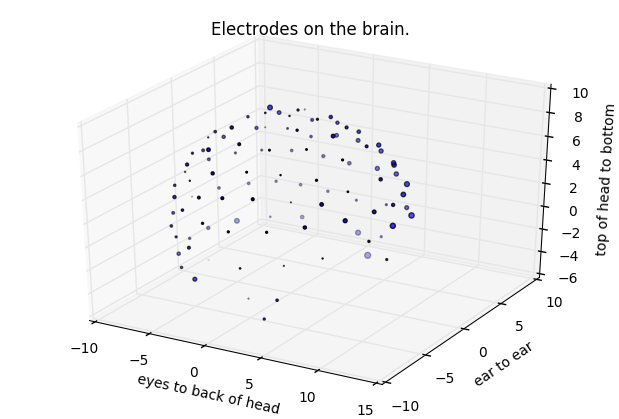

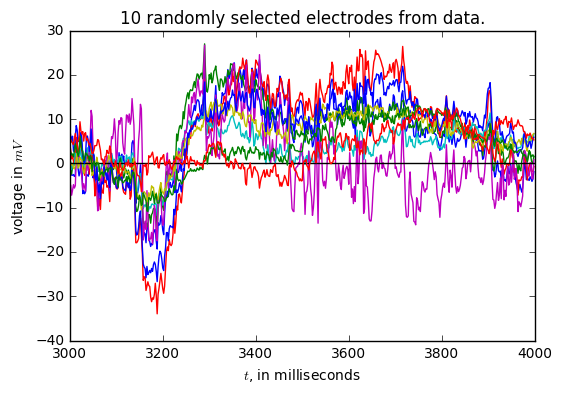

In [6]:
d = eeg_data[:, :, -1]
t = times[:, :, -1]

fig = plt.figure()
ax = Axes3D(fig)
x = cart[:, 0]
y = cart[:, 1]
z = cart[:, 2]
ax.scatter(x, y, z, s=np.abs(d[200]), depthshade = True)
ax.set_xlabel('eyes to back of head')
ax.set_ylabel('ear to ear')
ax.set_zlabel('top of head to bottom')
ax.set_title('Electrodes on the brain.')

plot_timeseries(data = d,
                      time = t,
                      selector = "random",
                      title = "10 randomly selected electrodes from data.",
                      start = 1500,
                      end = 2000,
                      skip = 1,
                      randno = 10,
                      xlab = r'$t$, in milliseconds',
                      ylab = r'voltage in $mV$')

## DETECT BAD CHANNELS

In [7]:
bad_chans = detect_bad_channels(eeg_data)
print bad_chans

detecting bad channels for patient 0
found 5 bad channels for patient 0
[[ 0  7 19 23 30]]


In [8]:
for channel in bad_chans[0]:
    assert np.sum(eeg_data[:, channel, 0]) == 0

## INTERPOLATE BAD CHANNELS

In [9]:
eeg_data, closest = interpolate(eeg_data, coords, bad_chans)

fitting a sphere to patient 0's head
interpolating patient 0's bad channels


### SHOW THAT THE CHANNELS ARE INTERPOLATED

Interpolating for channel: 0
Interpolating against:  [27 18 22]


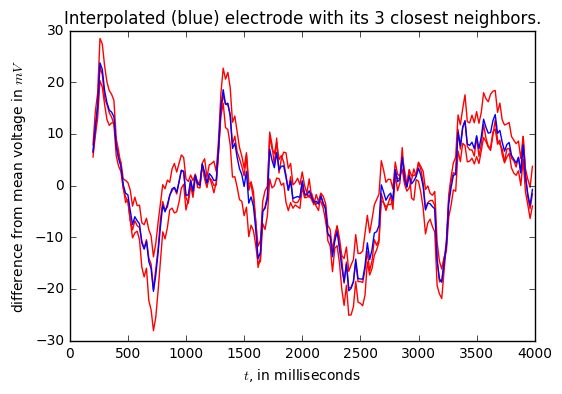

Interpolating for channel: 7
Interpolating against:  [27 18 22]


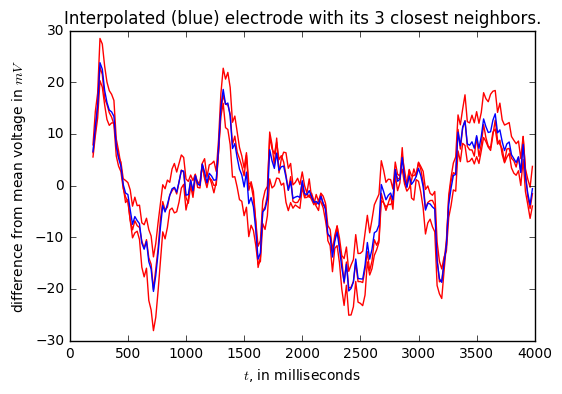

Interpolating for channel: 19
Interpolating against:  [22 28 13]


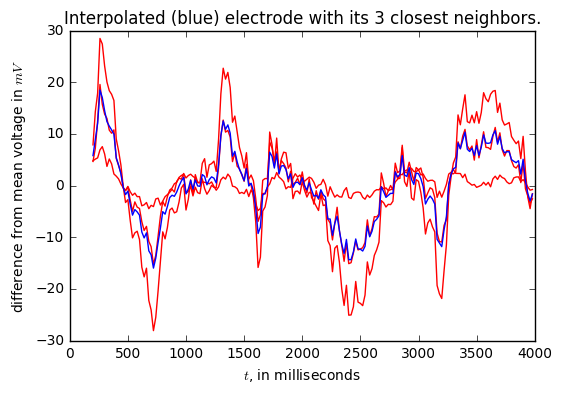

Interpolating for channel: 23
Interpolating against:  [27 18 22]


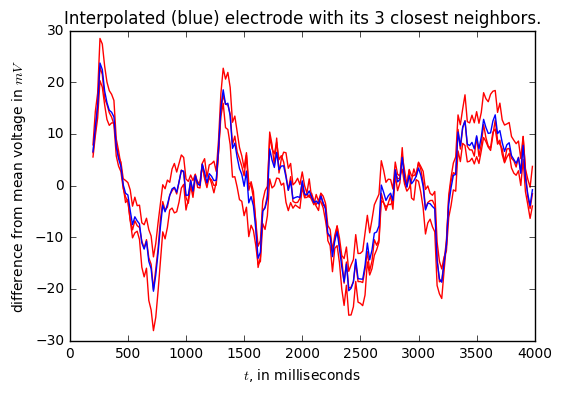

Interpolating for channel: 30
Interpolating against:  [29 27 34]


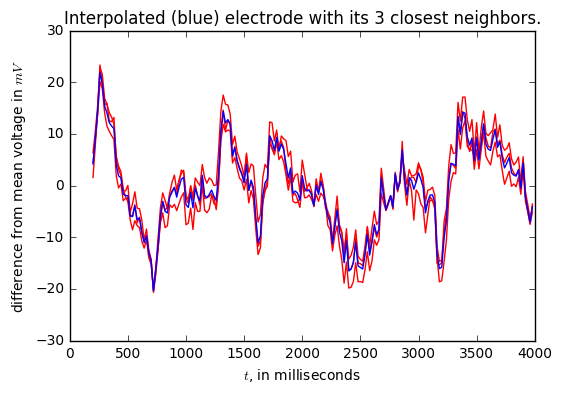

In [10]:
for l in range(len(closest[0])):
    print "Interpolating for channel: " + str(bad_chans[0][l])
    print "Interpolating against: ", closest[0][l]
    inds = closest[0][l]
    d = np.column_stack([eeg_data[:, i, 0] for i in inds])
    d = np.column_stack([d, eeg_data[:, bad_chans[0][l], 0]])
    cols = ["red"] * 3
    cols.append("blue")
    plot_timeseries(data = d,
                      time = t,
                      selector = "all",
                      title = "Interpolated (blue) electrode with its 3 closest neighbors.",
                      colors = cols,
                      start = 100,
                      end = 2000,
                      skip = 10,
                      xlab = r'$t$, in milliseconds',
                      ylab = r'difference from mean voltage in $mV$')

## REDUCE NOISE

In [11]:
eeg_data_better = reduce_noise(eeg_data)

    filtering time series from electrode 0


### SHOW THAT THE NOISE WAS REDUCED

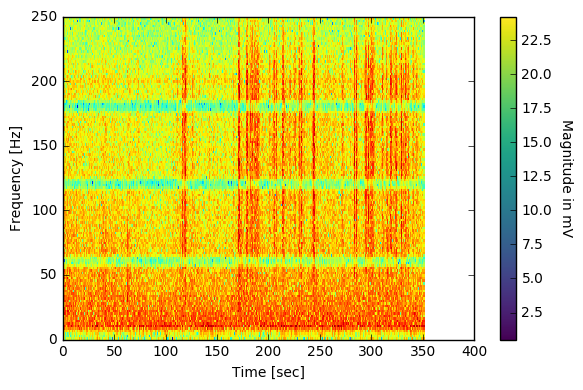

In [12]:
f, t, Sxx = spectrogram(eeg_data[:, 4, 0], 500)
plt.pcolormesh(t, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cmap = plt.get_cmap('viridis')
vmin = 20*np.log10(np.max(eeg_data[:, 4, 0]))  # hide anything below -40 dBc
cmap.set_under(color='k', alpha=None)

NFFT = 256
pxx,  freq, t, cax = ax.specgram(x/(NFFT/2), Fs=500, mode='magnitude',
                                 NFFT=NFFT, noverlap=NFFT/2,
                                 vmin=vmin, cmap=cmap)
cbar = plt.colorbar(cax)
cbar.ax.set_ylabel('Magnitude in mV', rotation=270)
cbar.ax.get_yaxis().labelpad = 15
plt.tight_layout()
plt.show()

# ALL TOGETHER

In [13]:
import main

In [14]:
main.main()

# EEG PIPELINE GO!
## GETTING DATA...
utils/tmp/A00055540_1.mat
  there is already a file named: utils/tmp/A00055540_1.mat, returned that path instead of pulling data.
## CLEANING DATA...
  cleaned eeg data...
  cleaned timescale data...
  cleaned electrode spherical coordinate data...
  shaping data...
## DETECTING BAD CHANNELS...
detecting bad channels for patient 0
found 5 bad channels for patient 0
## INTERPOLATING BAD CHANNELS...
fitting a sphere to patient 0's head
interpolating patient 0's bad channels
## REDUCING NOISE...
    filtering time series from electrode 0
